In [ ]:
import pandas as pd
import numpy as np

# To do 1

# 1
data = pd.read_csv("/content/sample_data/student.csv")

# 2
print(data.head())
print(data.tail())

# 3
print(data.info())

# 4
print(data.describe())


# Handling Missing value
missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
  if(missing_info[column] > 10):
    # inplace = False returns a new dataframe copy instead of operating on existing
    data[column].fillna(data[column].mean(), inplace = True)
  else:
    data.dropna(subset = [column], inplace = True)

# 5
# splitting into X (independent = math, readinng) and Y (dependent = writing)
X = data.drop(columns=["Writing"]).values
y = data["Writing"].values

   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000 

In [27]:
# To do 2
from numpy.random import randn

matrix_X = X.copy()
matrix_Y = y.copy()

n_features = X.shape[1]
matrix_W = np.random.randn(n_features)

matrix_Y_pred = matrix_X @ matrix_W

print(f"Matrix X shape: {matrix_X.shape}")
print(f"Matrix Y shape: {matrix_Y.shape}")
print(f"Matrix Y predicted shape: {matrix_Y_pred.shape}")
print(f"Matrix W shape: {matrix_W.shape}")

Matrix X shape: (1000, 2)
Matrix Y shape: (1000,)
Matrix Y predicted shape: (1000,)
Matrix W shape: (2,)


In [45]:
# To do 3

from random import shuffle
# making function for train_test split

def train_test_split(X, y, test_size = 0.3, random_seed = 42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])

  # shuffle the list of indices
  np.random.shuffle(indices)
  test_split_size = int(len(X) * test_size)

  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

# calling the above function and splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
# To do 4

def cost_function(X, Y, W):
  # Convert to numpy arrays
  X = np.array(X, dtype = float)

  # Adding a dimension 1 at the end for 1D numpy arrays
  Y = np.array(Y, dtype = float).reshape(-1, 1)
  W = np.array(W, dtype = float).reshape(-1, 1)

  n = len(Y)
  # Prediction: XW
  Y_prediction = X @ W
  error = Y_prediction - Y
  MSE = (1 / (2 * n)) * np.sum(error ** 2)

  return MSE

In [48]:
# To do 5

X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, Y_test, W_test)
if cost == 0:
  print("Proceed Further")
else:
  print("something went wrong: Reimplement a cost function")
print("Cost function output:", cost_function(X_test, Y_test, W_test))

Proceed Further
Cost function output: 0.0


In [49]:
# To do 6

def gradient_descent(X, Y, W, alpha=0.01, iterations=10):
  #Ensure inputs are numpay array and coorect shape
  X = np.array(X,dtype=float)
  Y = np.array(Y,dtype=float).reshape(-1,1)
  W = np.array(W,dtype=float).reshape(-1,1)

  m = len(Y)
  cost_history = [0] * iterations  # To store cost at each iteration
  W_update = W.copy()

  for iteration in range(iterations):
    # Step 1: Hypothesis values
      Y_pred = X @ W_update
    # Step 2: Difference between hypothesis and actual Y
      loss = Y_pred - Y
    # Step 3: Gradient calculation
      dw = (1/m) * (X.T @ loss)

    # Step 4: Update W
      W_update = W_update - alpha * dw

    # Step 5: Compute new cost
      # Cost
      cost = cost_function(X, Y, W_update)
      cost_history[iteration] = cost
    # PRINT one line per iteration
    # print(f"Iteration {iteration+1}:")
    # print("  Weights:\n", W_update)
    # print("  Cost:", cost)
    # print("-" * 30)
  return W_update, cost_history

In [50]:
# To do 7

# Generate random test data
import matplotlib.pyplot as plt
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:\n", final_params)
print("Cost History:", cost_history)

Final Parameters:
 [[0.20551667]
 [0.54295081]
 [0.10388027]]
Cost History: [np.float64(0.10711197094660153), np.float64(0.10634880599939901), np.float64(0.10559826315680618), np.float64(0.10486012948320558), np.float64(0.1041341956428534), np.float64(0.10342025583900626), np.float64(0.1027181077540776), np.float64(0.1020275524908062), np.float64(0.10134839451441931), np.float64(0.1006804415957737), np.float64(0.1000235047554587), np.float64(0.09937739820884377), np.float64(0.09874193931205609), np.float64(0.09811694850887098), np.float64(0.09750224927850094), np.float64(0.0968976680842672), np.float64(0.09630303432313951), np.float64(0.09571818027612913), np.float64(0.09514294105952065), np.float64(0.09457715457692842), np.float64(0.09402066147216397), np.float64(0.09347330508290017), np.float64(0.09293493139511913), np.float64(0.09240538899833017), np.float64(0.09188452904154543), np.float64(0.0913722051899995), np.float64(0.09086827358260123), np.float64(0.09037259279010502), np.flo

In [51]:
# To do 8

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  Y = np.array(Y).flatten()
  Y_pred = np.array(Y_pred).flatten()
  n = len(Y)
  rmse = np.sqrt((np.sum((Y - Y_pred)**2)) / n)
  return rmse

In [52]:
# To do 9

# Model Evaluation - R2
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  Y = np.array(Y).flatten()
  Y_pred = np.array(Y_pred).flatten()
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y)**2)
  ss_res = np.sum((Y - Y_pred)**2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [56]:
# To do 10

data = pd.read_csv("/content/sample_data/student.csv")

X = data[["Math", "Reading"]].values
Y = data["Writing"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_seed=42)

W = np.zeros(X_train.shape[1])
alpha = 0.00001
iterations = 1000

W_final, Cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

Y_predicted = np.dot(X_test, W_final)

RMSE_test = rmse(Y_test, Y_predicted)
R2_test = r2(Y_test, Y_predicted)

print("Final Weights:", W_final)
print("Cost History (First 10 iterations):", Cost_history[:10])
print("RMSE on Test Set:", RMSE_test)
print("R-Squared on Test Set:", R2_test)

Final Weights: [[0.34811659]
 [0.64614558]]
Cost History (First 10 iterations): [np.float64(2013.165570783755), np.float64(1640.286832599692), np.float64(1337.0619994901588), np.float64(1090.4794892850578), np.float64(889.9583270083234), np.float64(726.8940993009545), np.float64(594.2897260808594), np.float64(486.4552052951635), np.float64(398.7634463599484), np.float64(327.4517147324688)]
RMSE on Test Set: 5.2798239764188635
R-Squared on Test Set: 0.8886354462786421


# To do 11:

1. Did your model overfit, underfit, or is the performance acceptable?
- The model performance is acceptable. The cost function decreases smoothly, indicating proper convergence. The RMSE value of around 5.28 shows low prediction error, and the R-squared value of approximately 0.89 indicates that the model explains most of the variance in writing marks. This confirms that the model neither overfits nor underfits the data.

2. Experiment with different value of learning rate, making it higher and lower, observe the result.
- When the learning rate was set to 0.000000001, the final cost and RMSE were high and the R^2 was negative due to very high final cost. Plotting the convergence also illustrates that it is very slow from the low steepness of the plotted line.

- When the learning rate was set to 0.0001, the final cost and RMSE were relatively lower and the R^2 was postive due to lower final cost. Plotting the convergence also illustrates that it is very significantly faster as the plot is a steeper curve.


Learning rate: 1e-09
  Final Cost: 2423.9474939413362
  RMSE: 69.51626624076472
  R²: -18.30549621923516


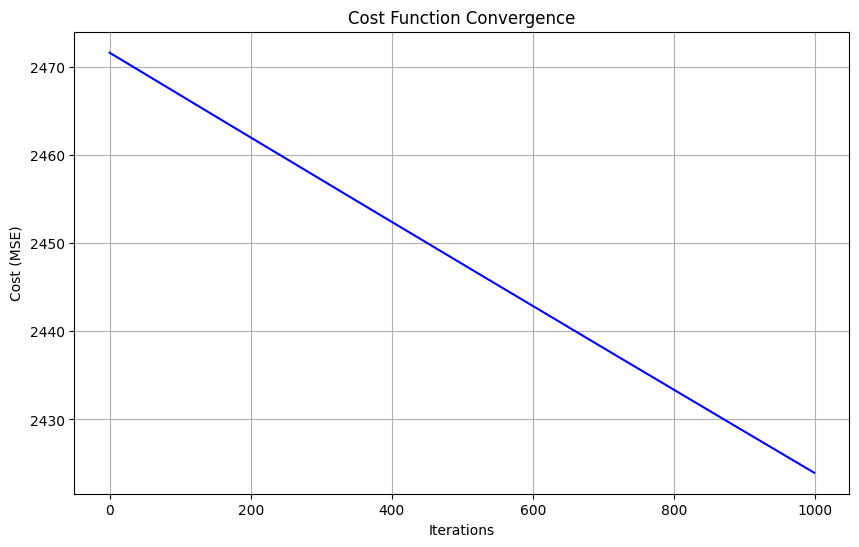


Learning rate: 0.0001
  Final Cost: 10.26076310841341
  RMSE: 4.792607360540954
  R²: 0.908240340333986


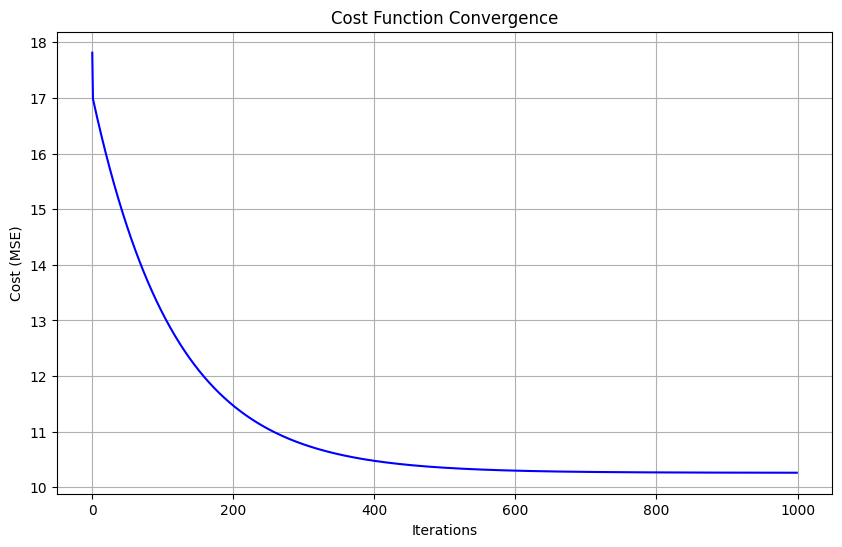

In [57]:
import matplotlib.pyplot as plt
def plot_cost(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('Cost Function Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

learning_rates = [0.000000001, 0.0001]
for alpha in learning_rates:
    print("\nLearning rate:", alpha)

    W = np.zeros(X_train.shape[1])
    iterations = 1000

    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W, alpha, iterations
    )

    Y_pred = X_test @ W_optimal

    print("  Final Cost:", cost_history[-1])
    print("  RMSE:", rmse(Y_test, Y_pred))
    print("  R²:", r2(Y_test, Y_pred))
    plot_cost(cost_history)